
# Time-Series CO2 EDA Template

This notebook expects the following files in the working directory:

- `cleaned_EDA_ready_timeseries.csv` — the cleaned, merged dataset (one row per country-year)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load
df = pd.read_csv("cleaned_EDA_ready_timeseries.csv")
print("Shape:", df.shape)
display(df)

Shape: (7830, 14)


Country Name Country Code  Year  GDP_current_usd  Population_total  \
0         Albania          ALB  1970     1.578102e+09         2135479.0   
1         Albania          ALB  1971     1.578102e+09         2187853.0   
2         Albania          ALB  1972     1.578102e+09         2243126.0   
3         Albania          ALB  1973     1.578102e+09         2296752.0   
4         Albania          ALB  1974     1.578102e+09         2350124.0   
...           ...          ...   ...              ...               ...   
7825     Zimbabwe          ZWE  2019     2.571566e+10        15271368.0   
7826     Zimbabwe          ZWE  2020     2.686856e+10        15526888.0   
7827     Zimbabwe          ZWE  2021     2.724051e+10        15797210.0   
7828     Zimbabwe          ZWE  2022     3.278966e+10        16069056.0   
7829     Zimbabwe          ZWE  2023     3.523137e+10        16340822.0   

      LifeExp_years  Energy_use_kg_oil_pc  Renewable_energy_pct  CO2_total_mt  \
0            65.234            813.373801                  25.5        4.8450   
1            65.896            813.373801                  25.5        4.8381   
2            66.526            813.373801                  25.5        5.5183   
3            67.107            813.373801                  25.5        4.9519   
4            67.633            813.373801                  25.5        5.3296   
...             ...                   ...                   ...           ...   
7825         61.060            412.165419                  81.0       11.1692   
7826         61.530            373.557246                  84.1        9.0721   
7827         60.135            405.518564                  82.4       10.6233   
7828         62.360            416.586875                  82.4       10.9630   
7829         62.775            416.586875                  82.4       11.7441   

      CO2_per_capita_ton  log1p_GDP_current_usd  log1p_Population_total  \
0               2.268812              21.179489               14.574202   
1               2.211346              21.179489               14.598432   
2               2.460094              21.179489               14.623381   
3               2.156045              21.179489               14.647007   
4               2.267795              21.179489               14.669979   
...                  ...                    ...                     ...   
7825            0.731382              23.970366               16.541490   
7826            0.584283              24.014223               16.558084   
7827            0.672480              24.027971               16.575344   
7828            0.682243              24.213379               16.592406   
7829            0.718697              24.285203               16.609177   

      log1p_Energy_use_kg_oil_pc  log1p_CO2_total_mt  
0                       6.702419            1.765587  
1                       6.702419            1.764405  
2                       6.702419            1.874614  
3                       6.702419            1.783710  
4                       6.702419            1.845237  
...                          ...                 ...  
7825                    6.023848            2.498908  
7826                    5.925745            2.309769  
7827                    6.007630            2.453012  
7828                    6.034493            2.481819  
7829                    6.034493            2.545068  

[7830 rows x 14 columns]

## 1) Global Trends

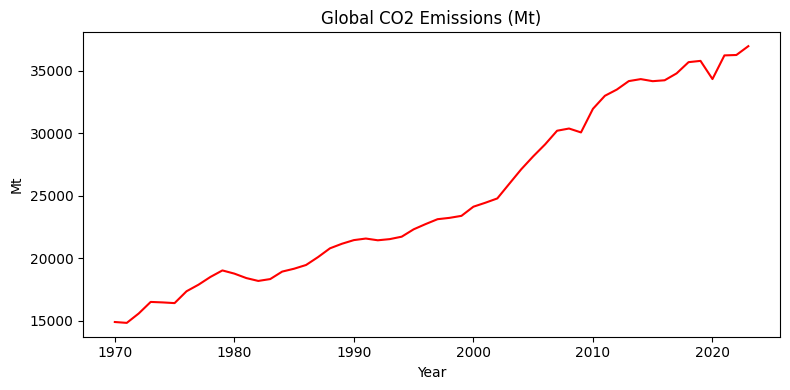

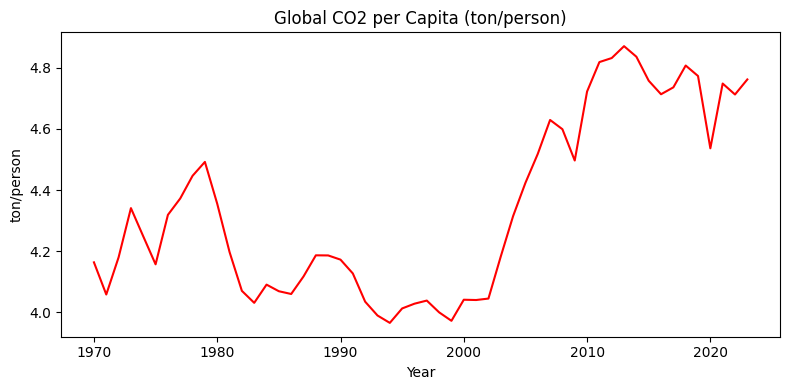

In [19]:

# Global CO2 (Mt)
global_co2 = df.groupby("Year")["CO2_total_mt"].sum()
plt.figure(figsize=(8,4))
plt.plot(global_co2.index, global_co2.values,color='red')
plt.title("Global CO2 Emissions (Mt)")
plt.xlabel("Year"); plt.ylabel("Mt")
plt.tight_layout(); plt.show()

# Global CO2 per capita (ton/person)
yearly = df.groupby("Year").agg(
    CO2_total_mt=("CO2_total_mt", "sum"),
    Population_total=("Population_total", "sum"))

global_co2_pc = (yearly["CO2_total_mt"]*1e6) / yearly["Population_total"]

plt.figure(figsize=(8,4))
plt.plot(global_co2_pc.index, global_co2_pc.values,color='red')
plt.title("Global CO2 per Capita (ton/person)")
plt.xlabel("Year"); plt.ylabel("ton/person")
plt.tight_layout(); plt.show()


## 2) Per-Country Trends (Top Emitters & per-capita)

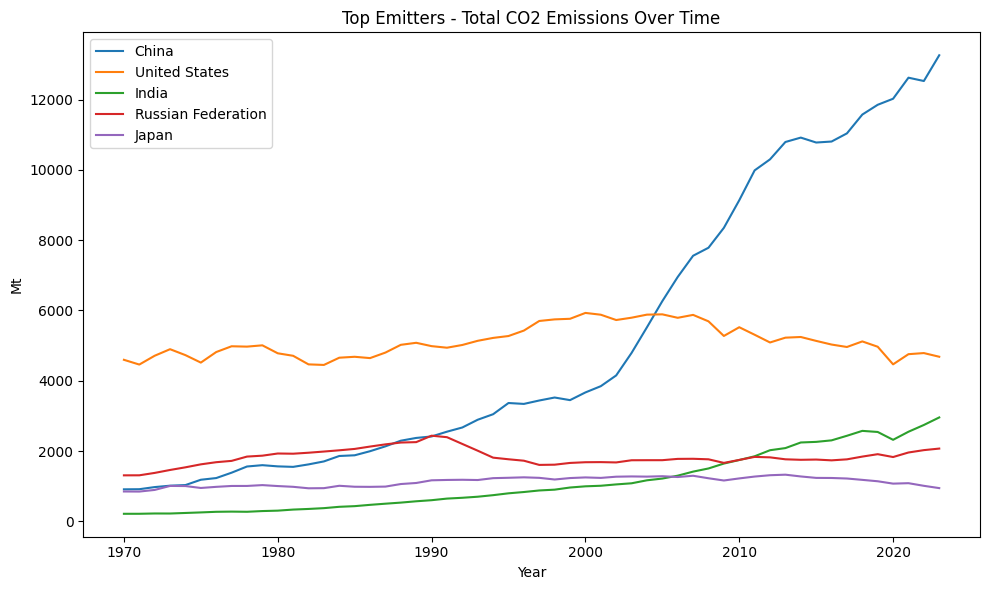

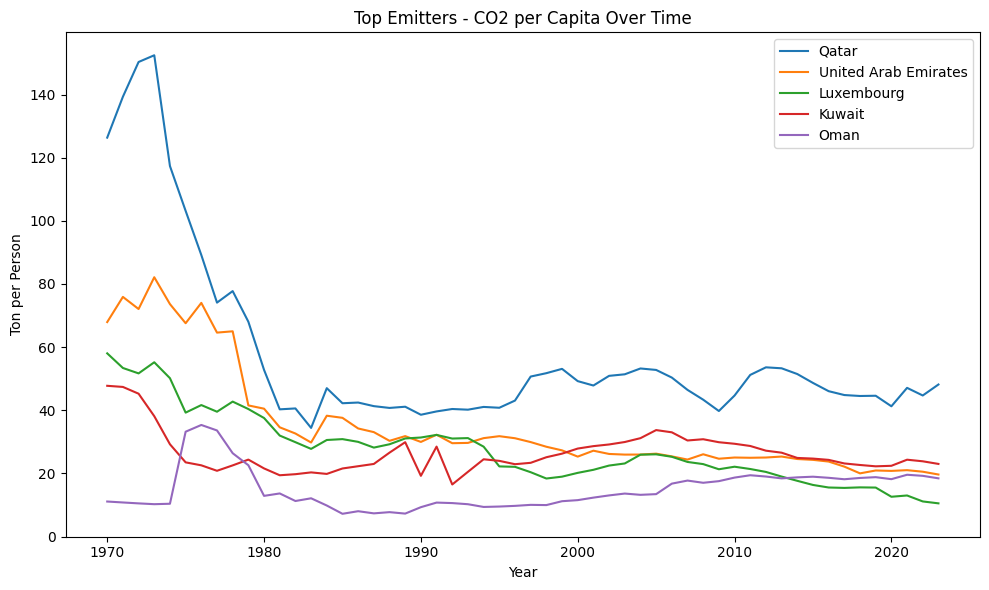

In [20]:
# Top 5 by total emissions
top_emitters_total = (
    df.groupby("Country Name")["CO2_total_mt"].max()
      .sort_values(ascending=False).head(5).index)

# Top 5 by per capita emissions
top_emitters_percap = (
    df.groupby("Country Name")["CO2_per_capita_ton"].max()
      .sort_values(ascending=False).head(5).index)

# Plot total CO2
plt.figure(figsize=(10,6))
for c in top_emitters_total:
    tmp = df[df["Country Name"]==c].groupby("Year")["CO2_total_mt"].mean()
    plt.plot(tmp.index, tmp.values, label=c)
plt.title("Top Emitters - Total CO2 Emissions Over Time")
plt.xlabel("Year"); plt.ylabel("Mt")
plt.legend(); plt.tight_layout(); plt.show()

# Plot per capita CO2
plt.figure(figsize=(10,6))
for c in top_emitters_percap:
    tmp = df[df["Country Name"]==c].groupby("Year")["CO2_per_capita_ton"].mean()
    plt.plot(tmp.index, tmp.values, label=c)
plt.title("Top Emitters - CO2 per Capita Over Time")
plt.xlabel("Year"); plt.ylabel("Ton per Person")
plt.legend(); plt.tight_layout(); plt.show()

## 3) Distributions

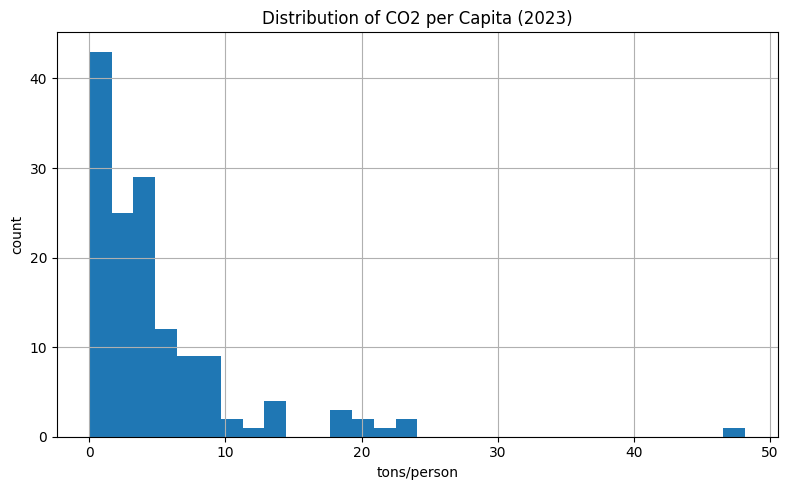

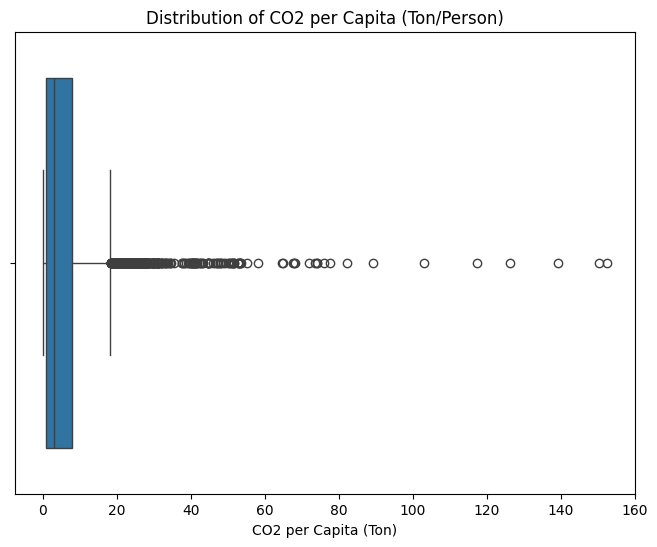

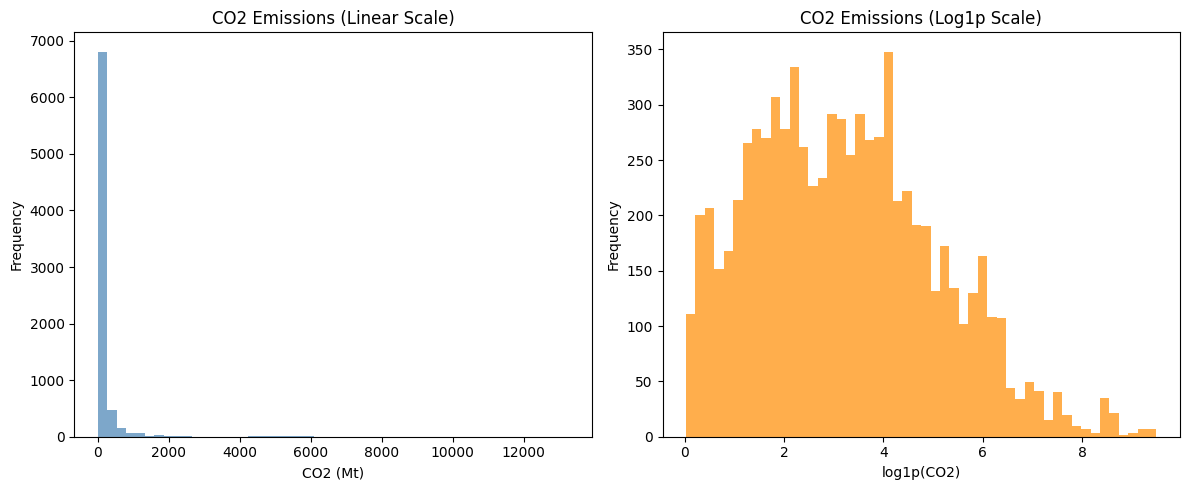

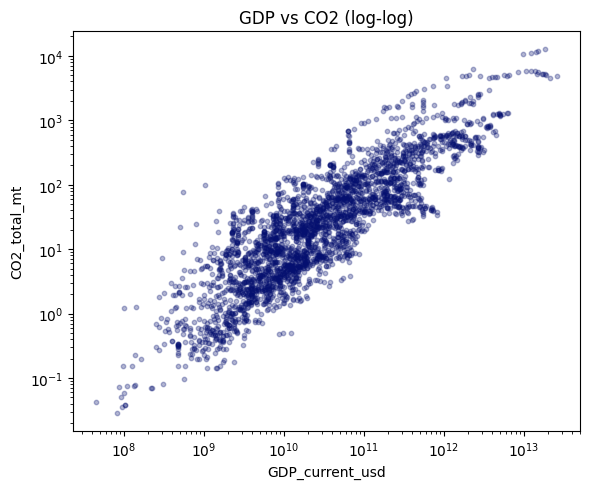

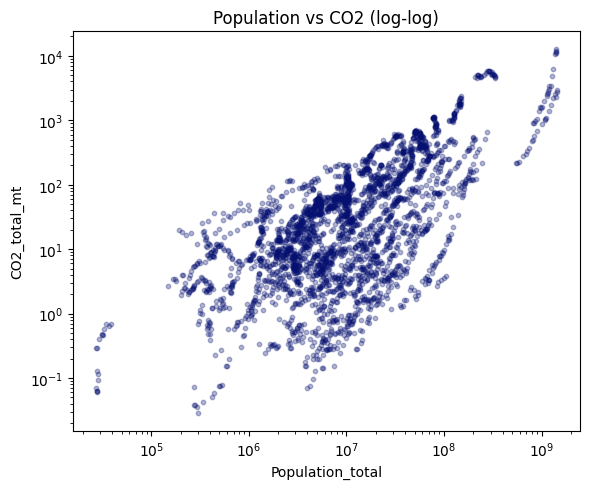

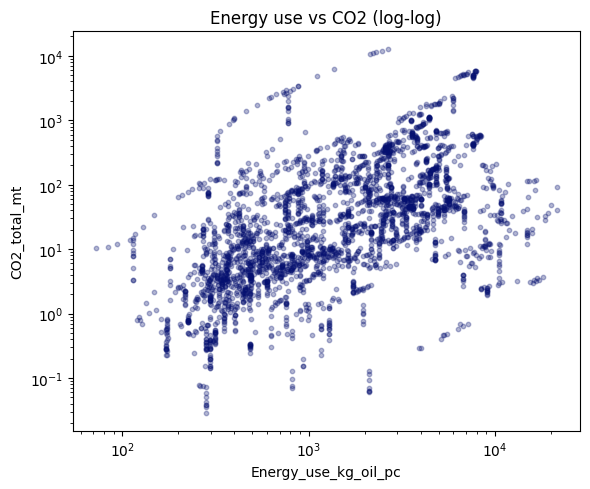

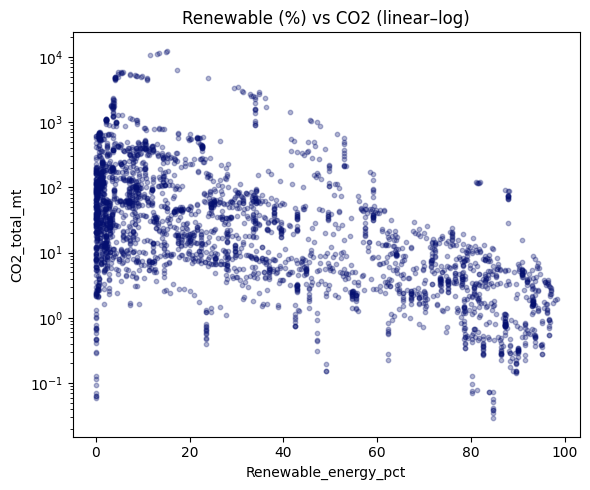

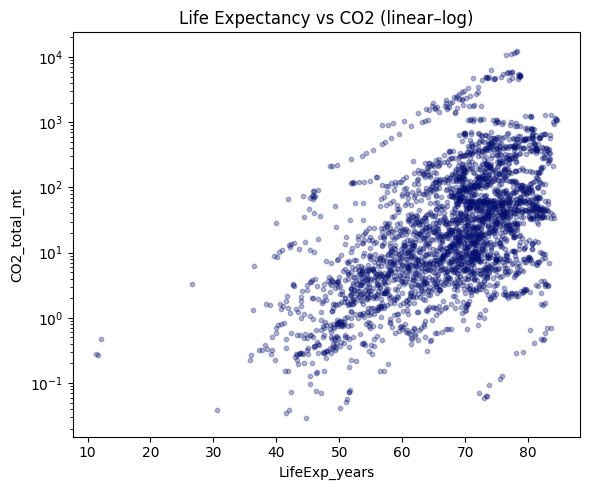

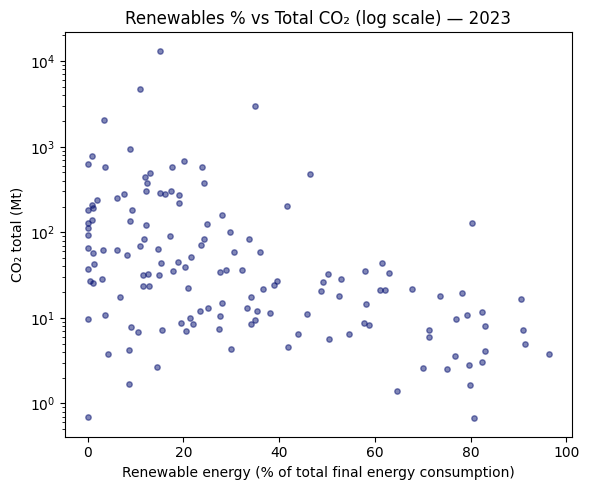

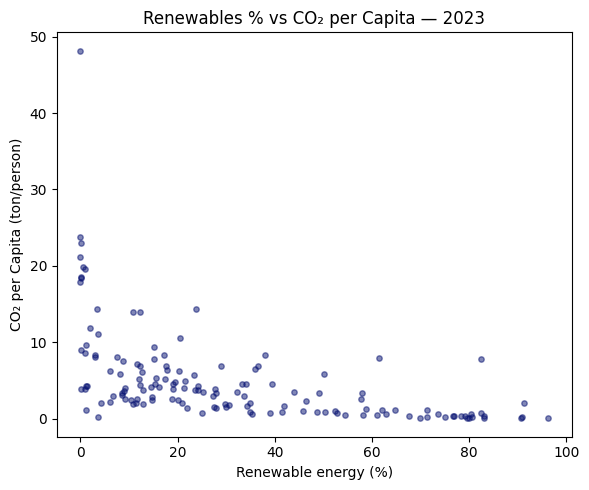

In [21]:
latest_year = int(df["Year"].max())

# Distribution of CO2 per capita (latest year)
plt.figure(figsize=(8,5))
df[df["Year"]==latest_year]["CO2_per_capita_ton"].dropna().hist(bins=30)
plt.title(f"Distribution of CO2 per Capita ({latest_year})")
plt.xlabel("tons/person"); plt.ylabel("count")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["CO2_per_capita_ton"])
plt.title("Distribution of CO2 per Capita (Ton/Person)")
plt.xlabel("CO2 per Capita (Ton)")
plt.show()

# Histogram (linear scale)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df["CO2_total_mt"], bins=50, color="steelblue", alpha=0.7)
plt.title("CO2 Emissions (Linear Scale)")
plt.xlabel("CO2 (Mt)")
plt.ylabel("Frequency")

# Histogram (log1p scale)
plt.subplot(1,2,2)
plt.hist(np.log1p(df["CO2_total_mt"]), bins=50, color="darkorange", alpha=0.7)
plt.title("CO2 Emissions (Log1p Scale)")
plt.xlabel("log1p(CO2)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Scatterplots
def _scatter(x, y, logx=False, logy=False, sample=3000, title=None):
    data = df[[x,y]].replace([np.inf,-np.inf], np.nan).dropna()
    if len(data) > sample:
        data = data.sample(sample, random_state=42)
    plt.figure(figsize=(6,5))
    plt.scatter(data[x], data[y], alpha=0.3, s=10,color="#051070")
    if logx: plt.xscale("log")
    if logy: plt.yscale("log")
    plt.xlabel(x); plt.ylabel(y); plt.title(title or f"{x} vs {y}"); plt.tight_layout(); plt.show()

_scatter("GDP_current_usd","CO2_total_mt", logx=True, logy=True, title="GDP vs CO2 (log-log)")
_scatter("Population_total","CO2_total_mt", logx=True, logy=True, title="Population vs CO2 (log-log)")
_scatter("Energy_use_kg_oil_pc","CO2_total_mt", logx=True, logy=True, title="Energy use vs CO2 (log-log)")
_scatter("Renewable_energy_pct","CO2_total_mt", logy=True, title="Renewable (%) vs CO2 (linear–log)")
_scatter("LifeExp_years", "CO2_total_mt", logy=True, title="Life Expectancy vs CO2 (linear–log)")

# Renewables vs CO₂ (Total & Per Capita)
d_latest = df[df["Year"] == latest_year][["Country Name","Renewable_energy_pct","CO2_total_mt"]].dropna()
plt.figure(figsize=(6,5))
plt.scatter(d_latest["Renewable_energy_pct"], d_latest["CO2_total_mt"], alpha=0.5, s=15,color="#051070")
plt.yscale("log")
plt.title(f"Renewables % vs Total CO₂ (log scale) — {latest_year}")
plt.xlabel("Renewable energy (% of total final energy consumption)")
plt.ylabel("CO₂ total (Mt)")
plt.tight_layout(); plt.show()

if "CO2_per_capita_ton" in df.columns:
    d_latest2 = df[df["Year"] == latest_year][["Country Name","Renewable_energy_pct","CO2_per_capita_ton"]].dropna()
    plt.figure(figsize=(6,5))
    plt.scatter(d_latest2["Renewable_energy_pct"], d_latest2["CO2_per_capita_ton"], alpha=0.5, s=15,color="#051070")
    plt.title(f"Renewables % vs CO₂ per Capita — {latest_year}")
    plt.xlabel("Renewable energy (%)")
    plt.ylabel("CO₂ per Capita (ton/person)")
    plt.tight_layout(); plt.show()

## 4) Rankings

In [22]:
# Top emitters in the latest year
ranking = df[df["Year"]==latest_year].sort_values("CO2_total_mt", ascending=False).head(10)
ranking_display = ranking[["Country Name","CO2_total_mt","CO2_per_capita_ton","Renewable_energy_pct"]].reset_index(drop=True)
display(ranking_display)

Country Name  CO2_total_mt  CO2_per_capita_ton  Renewable_energy_pct
0               China    13259.6390            9.399266                  15.2
1       United States     4682.0394           13.901285                  10.9
2               India     2955.1817            2.054964                  34.9
3  Russian Federation     2069.5020           14.388915                   3.5
4               Japan      944.7586            7.587408                   8.8
5  Iran, Islamic Rep.      778.8023            8.595226                   0.9
6           Indonesia      674.5359            2.398861                  20.2
7        Saudi Arabia      622.9136           18.482585                   0.1
8             Germany      582.9506            6.948000                  17.6
9              Canada      575.0120           14.345360                  23.8

## 5) Trend Slopes per Country

In [23]:
# Linear regression slope of CO2_total_mt vs Year per country
slopes = {}
for c, g in df.groupby("Country Name"):
    g2 = g.dropna(subset=["CO2_total_mt"])
    if len(g2) > 10:
        X = g2[["Year"]]
        y = g2["CO2_total_mt"]
        model = LinearRegression().fit(X, y)
        slopes[c] = float(model.coef_[0])   # slope

slopes_series = pd.Series(slopes).sort_values(ascending=False)
top_increase = slopes_series.head(10)
top_decrease = slopes_series.tail(10)
print("Top 10 countries CO2 increasing fastest")
display(top_increase.to_frame("slope"))
print("Top 10 countries CO2 decreasing fastest")
display(top_decrease.to_frame("slope"))

Top 10 countries CO2 increasing fastest


slope
China               244.427415
India                50.295509
Iran, Islamic Rep.   13.746149
Korea, Rep.          13.035437
Indonesia            12.339502
Saudi Arabia         11.246130
United States        11.006697
Brazil                8.014917
Turkiye               7.875920
Mexico                7.373266

Top 10 countries CO2 decreasing fastest


slope
Bulgaria                  -0.924075
Sweden                    -0.960392
Korea, Dem. People's Rep. -1.185617
Czechia                   -2.109237
Poland                    -2.185302
Romania                   -2.408200
France                    -3.512784
United Kingdom            -5.689091
Germany                   -9.452011
Ukraine                   -9.809986

## 6) Relationships Over Time

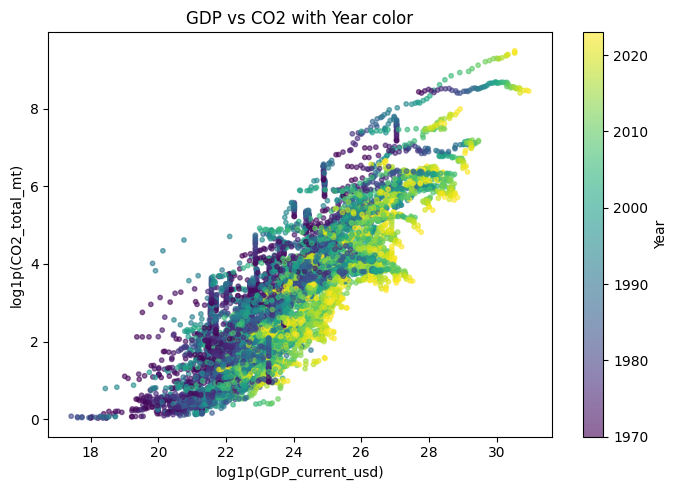

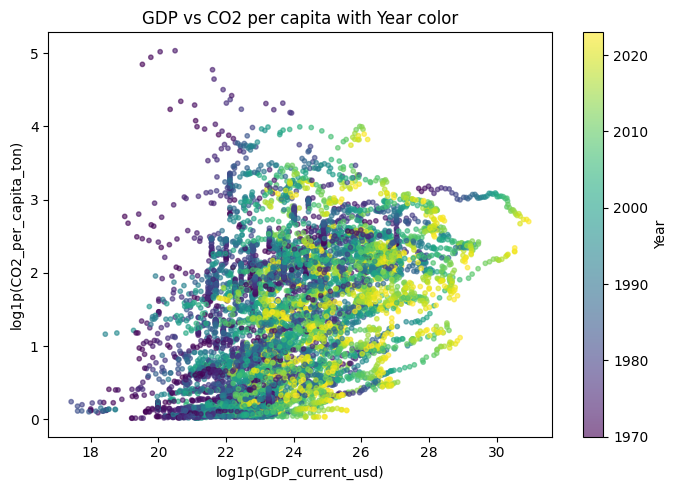

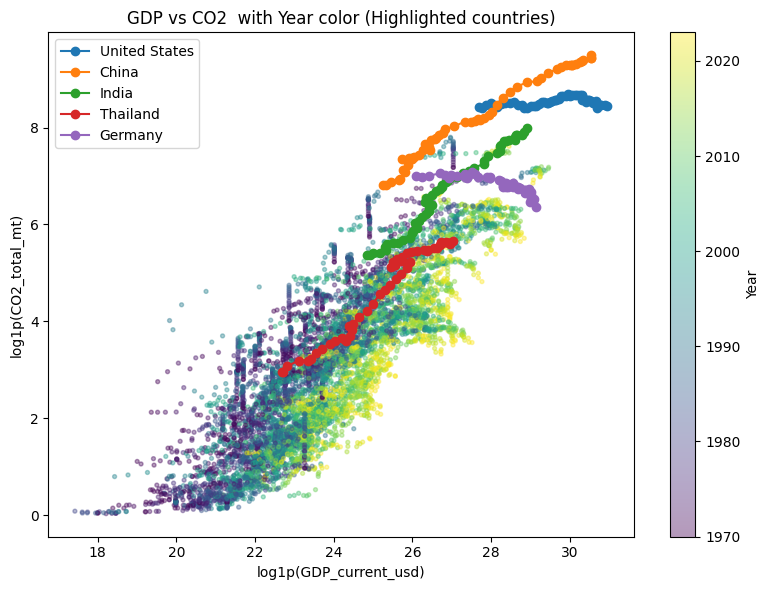

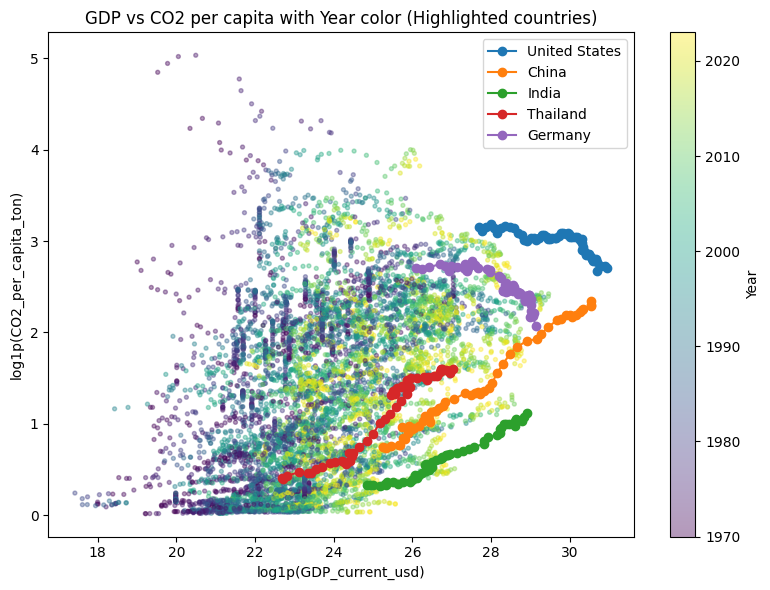

In [24]:
# gdp vs total emissions
plt.figure(figsize=(7,5))
plt.scatter(np.log1p(df["GDP_current_usd"]), np.log1p(df["CO2_total_mt"]),
            c=df["Year"], s=10, alpha=0.6)
plt.colorbar(label="Year")
plt.xlabel("log1p(GDP_current_usd)")
plt.ylabel("log1p(CO2_total_mt)")
plt.title("GDP vs CO2 with Year color")
plt.tight_layout(); plt.show()


# gdp vs per capita
if "CO2_per_capita_ton" not in df.columns:
    df["CO2_per_capita_ton"] = (df["CO2_total_mt"] * 1e6) / df["Population_total"]

plt.figure(figsize=(7,5))
plt.scatter(
    np.log1p(df["GDP_current_usd"]), 
    np.log1p(df["CO2_per_capita_ton"]), 
    c=df["Year"], s=10, alpha=0.6)
plt.colorbar(label="Year")
plt.xlabel("log1p(GDP_current_usd)")
plt.ylabel("log1p(CO2_per_capita_ton)")
plt.title("GDP vs CO2 per capita with Year color")
plt.tight_layout(); plt.show()

# highlight chosen countries
highlight_countries = ["United States", "China", "India", "Thailand", "Germany"]
# # gdp vs total emissions
plt.figure(figsize=(8,6))
sc2 = plt.scatter(np.log1p(df["GDP_current_usd"]), 
                 np.log1p(df["CO2_total_mt"]), 
                 c=df["Year"], s=8, alpha=0.4, cmap="viridis")

for country in highlight_countries:
    tmp = df[df["Country Name"] == country]
    plt.plot(np.log1p(tmp["GDP_current_usd"]), 
             np.log1p(tmp["CO2_total_mt"]),
             marker="o", linestyle="-", label=country)

plt.colorbar(sc2, label="Year")
plt.xlabel("log1p(GDP_current_usd)")
plt.ylabel("log1p(CO2_total_mt)")
plt.title("GDP vs CO2  with Year color (Highlighted countries)")
plt.legend()
plt.tight_layout()
plt.show()

# gdp vs per capita
plt.figure(figsize=(8,6))
sc = plt.scatter(np.log1p(df["GDP_current_usd"]), 
                 np.log1p(df["CO2_per_capita_ton"]), 
                 c=df["Year"], s=8, alpha=0.4, cmap="viridis")

for country in highlight_countries:
    tmp = df[df["Country Name"] == country]
    plt.plot(np.log1p(tmp["GDP_current_usd"]), 
             np.log1p(tmp["CO2_per_capita_ton"]),
             marker="o", linestyle="-", label=country)

plt.colorbar(sc, label="Year")
plt.xlabel("log1p(GDP_current_usd)")
plt.ylabel("log1p(CO2_per_capita_ton)")
plt.title("GDP vs CO2 per capita with Year color (Highlighted countries)")
plt.legend()
plt.tight_layout()
plt.show()

## 7) Correlation Heatmap

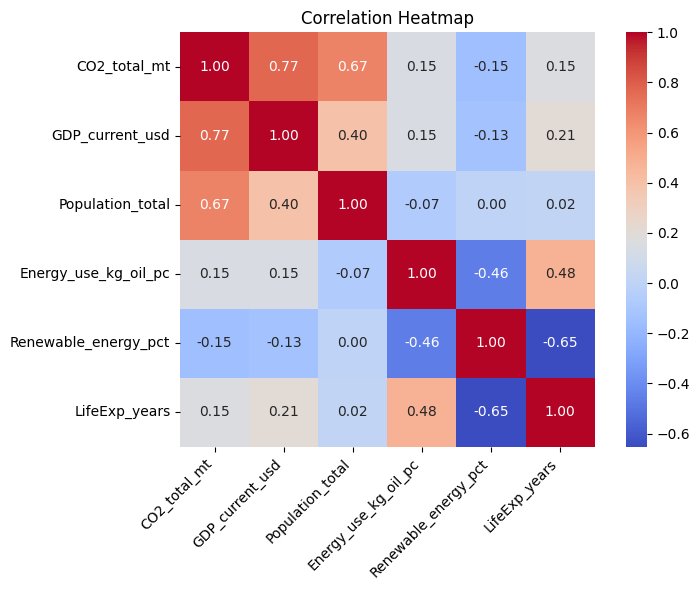

In [25]:
corr_cols = ["CO2_total_mt","GDP_current_usd","Population_total","Energy_use_kg_oil_pc","Renewable_energy_pct","LifeExp_years"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Heatmap"); plt.tight_layout(); plt.show()